In [3]:
library(Seurat)
library(SeuratData)
library(ggplot2)
library(patchwork)
library(dplyr)
library(cowplot)

In [4]:
setwd("/workdir/user/T166457-Bone")

In [5]:
Bone_166457_tissue<-Load10X_Spatial(data.dir = '/workdir/user/SpaceRanger/166457-F1/outs',
                        assay = "Spatial",slice = "slice1")

png 
  2

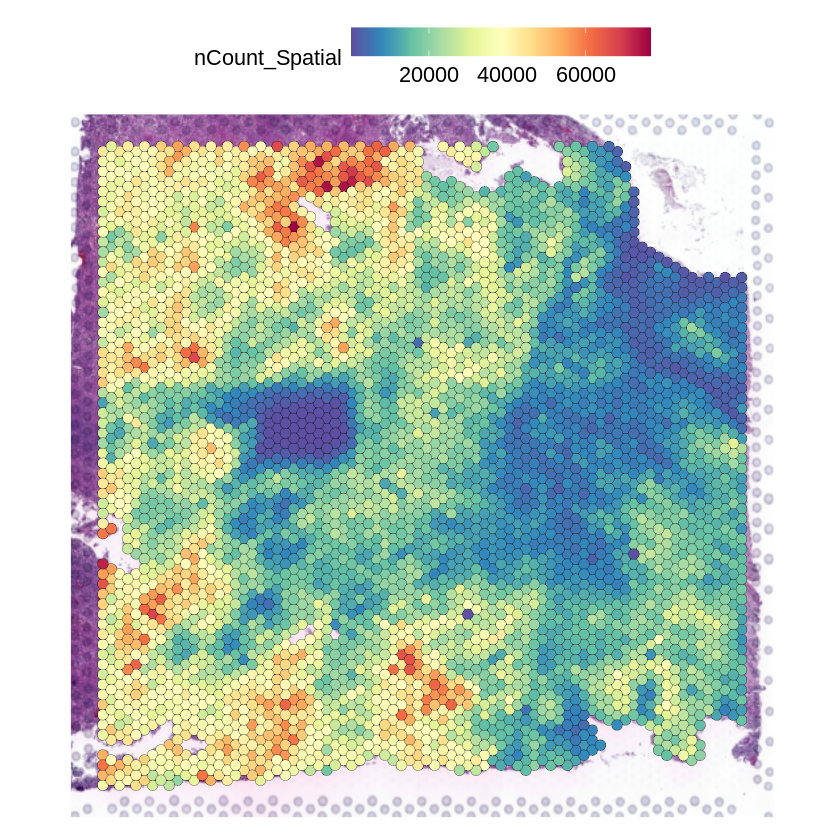

In [36]:
#组织上所有基因的表达情况
p0 <- SpatialFeaturePlot(Bone_166457_tissue, features = "nCount_Spatial") + 
                        theme(legend.position = "top",legend.text = element_text(size = 13),
                              legend.title = element_text(size = 13),legend.key.width=unit(2.5,"line"))
p0
pdf("1-Bone_166457-F1_nCount_Spatial.pdf")
p0
dev.off()

In [40]:
Bone_166457_tissue<- SCTransform(Bone_166457_tissue, assay = "Spatial", return.only.var.genes = FALSE, verbose = FALSE)
Bone_166457_tissue <- RunPCA(Bone_166457_tissue, assay = "SCT", verbose = FALSE)  
## UMAP可视化: FindNeighbors，FindClusters 先找到最佳聚类数
Bone_166457_tissue <- FindNeighbors(Bone_166457_tissue, reduction = "pca", dims = 1:30)
Bone_166457_tissue <- FindClusters(Bone_166457_tissue,resolution = c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 
                                                                     1.2, 1.5, 1.8, 2, 2.5, 3), verbose = FALSE)
Bone_166457_tissue <- RunUMAP(Bone_166457_tissue, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN

17:34:54 UMAP embedding parameters a = 0.9922 b = 1.112

17:34:54 Read 4558 rows and found 30 numeric columns

17:34:54 Using Annoy for neighbor search, n_neighbors = 30

17:34:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:34:55 Writing NN index file to temp file /tmp/Rtmp6TJo16/file5b53f77216ec4

17:34:55 Searching Annoy index using 1 thread, search_k = 3000

17:34:57 Annoy recall = 100%

17:34:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:35:01 Initializing from normalized Laplacian + noise (using irlba)

17:35:02 Commencing optimization for 500 epochs, with 192068 positive edges

17:35:21 Optimization finished



In [41]:
str(Bone_166457_tissue)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ Spatial:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:26075631] 1 5 6 7 9 11 12 13 14 16 ...
  .. .. .. .. .. ..@ p       : int [1:4559] 0 8333 15247 21554 28205 34144 39292 45103 48798 56899 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 17943 4558
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:17943] "SAMD11" "NOC2L" "KLHL17" "PLEKHN1" ...
  .. .. .. .. .. .. ..$ : chr [1:4558] "AAACAACGAATAGTTC-1" "AAACAAGTATCTCCCA-1" "AAACACCAATAACTGC-1" "AAACAGAGCGACTCCT-1" ...
  .. .. .. .. .. ..@ x       : num [1:26075631] 1 1 6 2 1 2 3 13 1 5 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:26075631] 1 5 6 7 9 11 12 13 14 16

In [42]:
saveRDS(Bone_166457_tissue,"Bone_166457_tissue_UMAP.rds")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


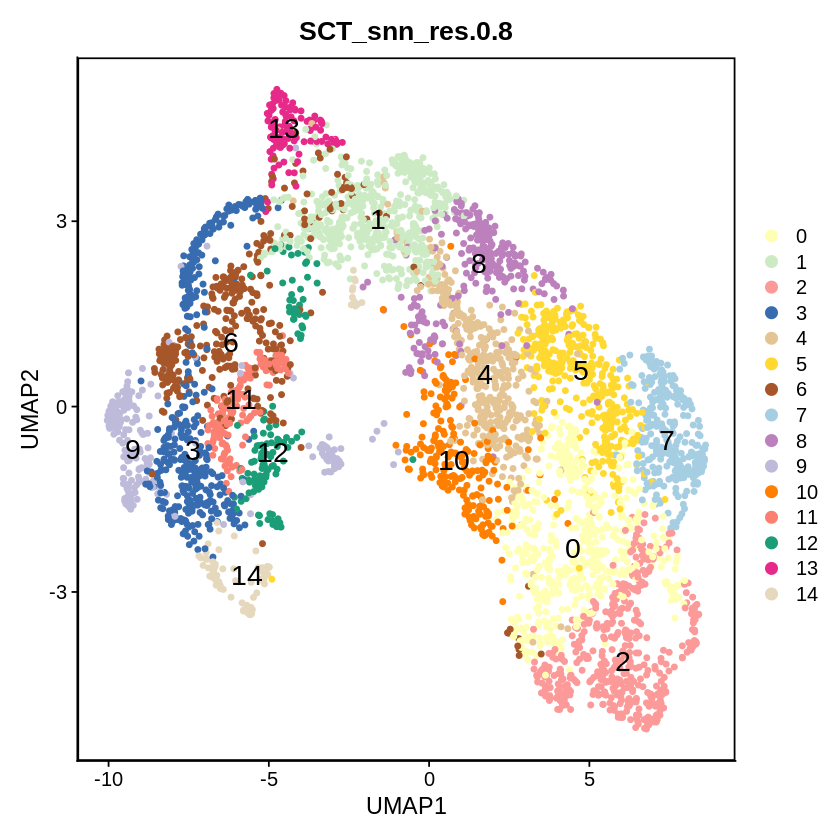

png 
  2

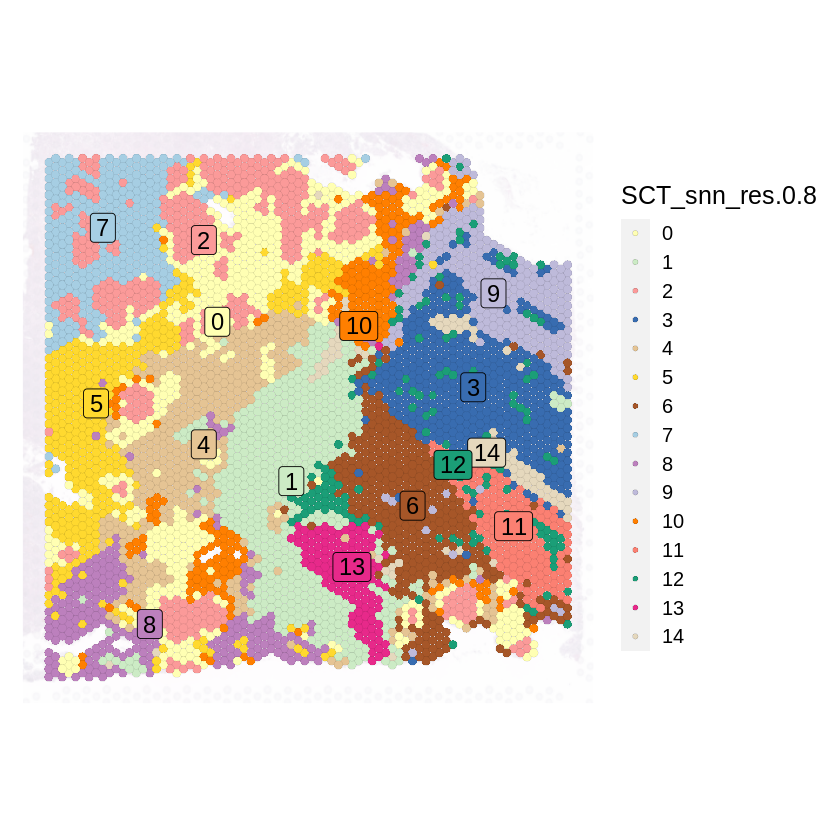

In [319]:
#这里为了突出肉芽肿核心区域，对于每个样本，哪里是核心，哪里可以调整为相对醒目的颜色
spatial_cluster_cols<-c("#FFFFB3", "#CCEBC5", "#FB9A99", "#386CB0", "#E5C494","#FFD92F", "#A65628", "#A6CEE3", "#BC80BD", "#BEBADA",
                        "#FF7F00", "#FB8072", "#1B9E77", "#E7298A", "#E5D8BD","#FDCDAC", "#B3E2CD", "#A6D854", "#66C2A5", "#DECBE4")
names(spatial_cluster_cols)<-0:19
p1 <- DimPlot(Bone_166457_tissue, group.by= "SCT_snn_res.0.8", reduction = "umap", pt.size = 1.3,
              label = TRUE,label.size = 6,cols=spatial_cluster_cols)+     # 绘制UMAP分群图；
      labs(x = "UMAP1", y = "UMAP2")+
      theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))
      
p1
p2 <- SpatialDimPlot(Bone_166457_tissue, group.by= "SCT_snn_res.0.8", label = TRUE, label.size = 5,label.color = "black",
                     image.alpha = 0.1,stroke = 0.05,cols=spatial_cluster_cols)+
      theme(legend.text = element_text(size=12),legend.title = element_text(size=15))
p2
pdf(file="2-Bone_166457_cluster_UMAP_res0.8.pdf", width=12, height=6)
p1 + p2
dev.off()

In [320]:
# 基因表达箱线图
library(ggpubr)
library(patchwork)#如果没有安装要先安装
#set.seed(123)#设种子数
df = Bone_166457_tissue[[c("nCount_Spatial","SCT_snn_res.0.8")]]
colnames(df) = c("nCount_Spatial","Cluster")
pdf("2-Bone_166457_cluster_box_res0.8.pdf",width = 8)
ggboxplot(df, x = "Cluster", y = "nCount_Spatial",fill = "Cluster",palette = spatial_cluster_cols,width = 0.6,outlier.shape = NA,)+
         stat_compare_means(label.x = 7)+ # 根据x轴调整p值显示位置
         theme(axis.text.x = element_text(size = 14),axis.text.y = element_text(size = 14),
               axis.title.x = element_text(size = 16,vjust = 1),axis.title.y = element_text(size = 16,vjust = 1),
               legend.title = element_text(size=13),legend.text = element_text(size=12)
)
dev.off()

png 
  2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

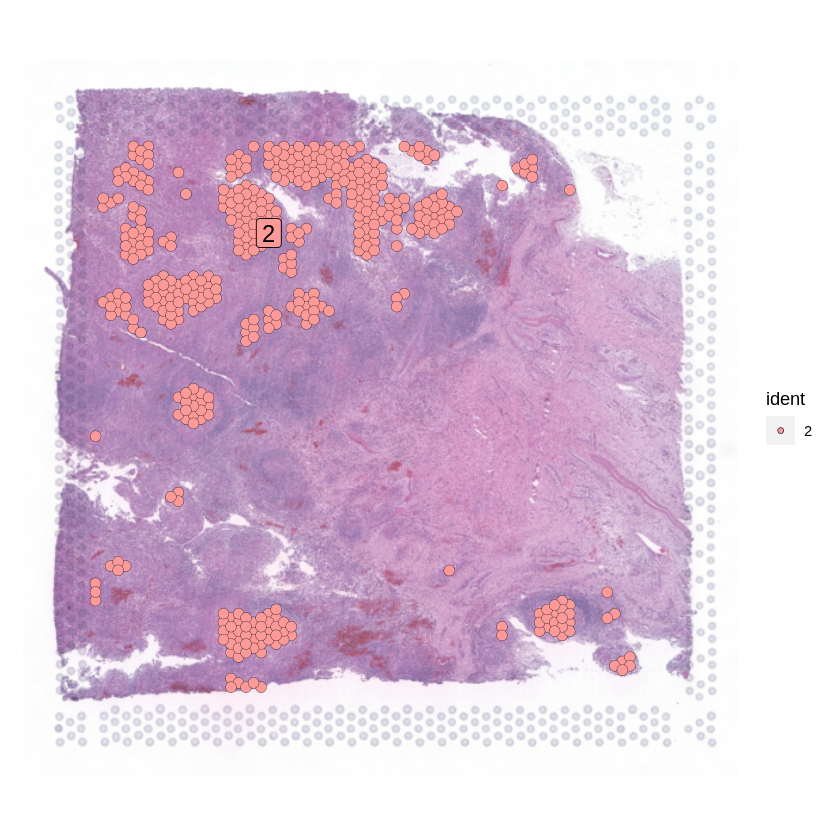

In [321]:
## 查看特定cluster的分布 这里一次聚类就可以看出肉芽肿的位置，所以按照一次聚类的结果显示肉芽肿核心处的cluster
Idents(Bone_166457_tissue)<-'SCT_snn_res.0.8'
cluster_spatial <- subset(Bone_166457_tissue, idents = c(2))
p1<-SpatialDimPlot(cluster_spatial,crop = FALSE, label = TRUE,label.box = T,label.size = 5,image.alpha = 0.7,alpha=1,label.color="black",
                   cols=spatial_cluster_cols[3])
p1
pdf(file="2-Bone_166457_cluster_UMAP_res0.8_cluster2.pdf", width=5, height=5)
p1
dev.off()

In [91]:
## 保存整张片子的meta信息
Bone_166457_tissue_metadata<-Bone_166457_tissue@meta.data
write.csv(Bone_166457_tissue_metadata,"Bone_166457_tissue_metadata.csv")
## 保存肉芽肿区域的meta信息
Bone_166457_tissue_granuloma<-subset(Bone_166457_tissue@meta.data,Bone_166457_tissue@meta.data$SCT_snn_res.0.8 %in% c(2) )
#head(Bone_166457_tissue_granuloma)
write.csv(Bone_166457_tissue_granuloma,"./Bone_166457_granuloma/Bone_166457_tissue_res0.8_granuloma_metadata_2.csv")

Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Warning message in .filterFeatures(expr, method):
“20 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


Estimating GSVA scores for 50 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



png 
  2

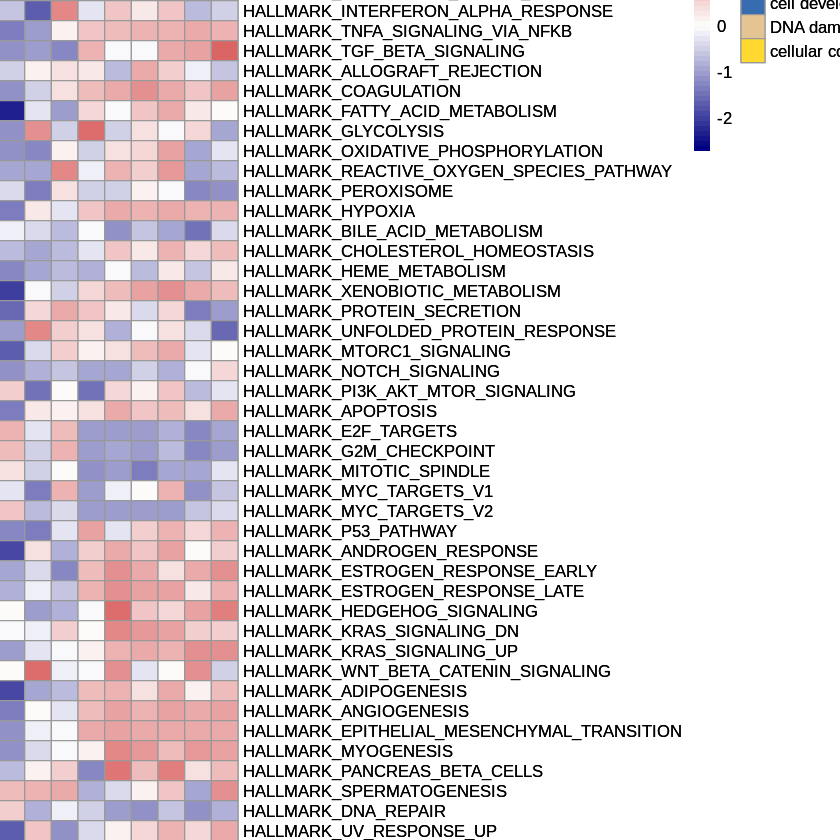

In [196]:
## 通路功能分析
library(msigdbr)  
library(GSVA)  
library(GSEABase)
genesets <- msigdbr(species = "Homo sapiens", category = "H") #msigdbr 包提供多个物种的MSigDB数据
genesets <- subset(genesets, select = c("gs_name","gene_symbol")) %>% as.data.frame()
genesets <- split(genesets$gene_symbol, genesets$gs_name)
Idents(Bone_166457_tissue)="SCT_snn_res.0.8"
expr <- AverageExpression(Bone_166457_tissue, assays = "Spatial", slot = "data")[[1]] ## 提取分组平均表达矩阵
expr <- expr[rowSums(expr)>0,]  #选取非零基因
expr <- as.matrix(expr)
gsva.res <- gsva(expr, genesets, method="gsva") 
write.csv(gsva.res,"3-Bone_166457_cluster_GSVA_res0.8_row.csv")
## 行注释文件
hallmark_class<-read.csv("/workdir/user/hallmark_class_wangjie.csv",header=T,row.names=1)
annotation_colors=list(class=c("immune"="#FB9A99", "metabolic/hypoxia/ROS"="#CCEBC5", "cell growth and proliferation"="#BEBADA", 
                             "cell development"="#386CB0", "DNA damage"="#E5C494", "cellular component"="#FFD92F"))
#head(hallmark_class)
gsva.res<-as.data.frame(gsva.res)
gsva.res_new<-gsva.res [rownames(hallmark_class),as.character(c(2,7,0,5,8,10,1,4,13,3,6,9,11,12))] #调整行序（功能类型）和列序（肉芽肿位置）
gsva.res_new$class<-hallmark_class$class
#head(gsva.res_new)
library(pheatmap)
p = pheatmap(gsva.res_new[,-ncol(gsva.res_new)], show_colnames = T, cluster_cols = F,cluster_row = F,scale = "row",angle_col = "45",
             color = colorRampPalette(c("navy", "white", "firebrick3"))(50),cellwidth =16,cellheight = 12,
             annotation_row=hallmark_class,annotation_colors=annotation_colors,annotation_names_row=F,fontsize=10,
             fontsize_col = 14,fontsize_row = 10)#,border_color="red")
p
pdf(file="3-Bone_166457_cluster_GSVA_res0.8_row.pdf", width=12, height=10)
p
dev.off()

In [197]:
# RCTD去卷积
#devtools::install_github("dmcable/spacexr", build_vignettes = FALSE)  # 在服务器中的R运行
library(spacexr)
library(Matrix)


Attaching package: ‘Matrix’


The following object is masked from ‘package:S4Vectors’:

    expand




In [204]:
## 读取配对的单细胞数据
Bone_166457_sc <- readRDS("/workdir/user/scRNA-data-filtered-bone-20221115.rds")
data=as.data.frame(table(Bone_166457_sc$celltype))
# 删掉<25个细胞的细胞类型
filter = as.vector(data[data$Freq < 25,'Var1']) 
Idents(Bone_166457_sc)<-Bone_166457_sc$celltype
Bone_166457_sc = subset(Bone_166457_sc,idents=filter,invert=TRUE)


    Macro-c01-C1QA Macro-c02-ADAMDEC1     Macro-c03-APOE      Macro-c04-C1S 
               423                173                393                382 
 Macro-c05-SELENOP    Macro-c06-FABP4     Macro-c07-RND3     Macro-c08-EMP1 
               404                 98                 77                193 
      Macro-c09-CP     Macro-c10-SPP1  Macro-c11-CLEC10A     Macro-c12-IDO1 
               562                149                455                393 
  Macro-c13-COL6A3    Macro-c14-RPS18    Macro-c15-PCLAF  Mono-c01-APOBEC3A 
               236                277                 82                724 
   Mono-c02-S100A9    Mono-c03-CDKN1C     cDC-c01-CLEC9A    cDC-c02-CLEC10A 
               221                227                141                351 
      cDC-c03-LAD1       pDC-c01-GZMB     Neu-c01-S100A8     Neu-c02-IFITM3 
               235                389                343                598 
  Neu-c03-HIF1AAS3     Neu-c04-CXCL10        Neu-c05-LTF     Mast-c01-TPSB2

[1] 63

In [208]:
counts = as.matrix(Bone_166457_sc@assays$RNA@counts)
nUMI = Bone_166457_sc$nCount_RNA
cell_types = droplevels(Bone_166457_sc$celltype)
reference <- Reference(counts, cell_types, nUMI)
pos=Bone_166457_tissue@images$slice1@coordinates[,c("row","col")]
names(pos)[1] <-"x"
names(pos)[2] <-"y"
pos$x = (pos$x - min(pos$x))/(max(pos$x) - min(pos$x))
pos$y = (pos$y - min(pos$y))/(max(pos$y) - min(pos$y))
counts_Bone_166457_tissue = as.matrix(Bone_166457_tissue@assays$Spatial@counts)
nUMI_Bone_166457_tissue = Bone_166457_tissue$nCount_Spatial
puck <- SpatialRNA(pos, counts_Bone_166457_tissue, nUMI_Bone_166457_tissue)
barcodes <- colnames(puck@counts)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.3 GiB”


In [209]:
myRCTD <- create.RCTD(puck, reference, max_cores = 30,CELL_MIN_INSTANCE = 25) #CELL_MIN_INSTANCE 每个像素的最小细胞类型数 max_cores内核数。经验法则是使用机器上最大内核数的一半
myRCTD <- run.RCTD(myRCTD, doublet_mode = 'full')

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 30324

process_cell_type_info: number of genes in reference: 23668




    Macro-c01-C1QA Macro-c02-ADAMDEC1     Macro-c03-APOE      Macro-c04-C1S 
               423                173                393                382 
 Macro-c05-SELENOP    Macro-c06-FABP4     Macro-c07-RND3     Macro-c08-EMP1 
               404                 98                 77                193 
      Macro-c09-CP     Macro-c10-SPP1  Macro-c11-CLEC10A     Macro-c12-IDO1 
               562                149                455                393 
  Macro-c13-COL6A3    Macro-c14-RPS18    Macro-c15-PCLAF  Mono-c01-APOBEC3A 
               236                277                 82                724 
   Mono-c02-S100A9    Mono-c03-CDKN1C     cDC-c01-CLEC9A    cDC-c02-CLEC10A 
               221                227                141                351 
      cDC-c03-LAD1       pDC-c01-GZMB     Neu-c01-S100A8     Neu-c02-IFITM3 
               235                389                343                598 
  Neu-c03-HIF1AAS3     Neu-c04-CXCL10        Neu-c05-LTF     Mast-c01-TPSB2

End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: Macro-c01-C1QA found DE genes: 126

get_de_genes: Macro-c02-ADAMDEC1 found DE genes: 122

get_de_genes: Macro-c03-APOE found DE genes: 143

get_de_genes: Macro-c04-C1S found DE genes: 152

get_de_genes: Macro-c05-SELENOP found DE genes: 157

get_de_genes: Macro-c06-FABP4 found DE genes: 103

get_de_genes: Macro-c07-RND3 found DE genes: 91

get_de_genes: Macro-c08-EMP1 found DE genes: 174

get_de_genes: Macro-c09-CP found DE genes: 130

get_de_genes: Macro-c10-SPP1 found DE genes: 113

get_de_genes: Macro-c11-CLEC10A found DE genes: 106

get_de_genes: Macro-c12-IDO1 found DE genes: 203

get_de_genes: Macro-c13-COL6A3 found DE genes: 75

get_de_genes: Macro-c14-RPS18 found DE genes: 7

get_de_genes: Macro-c15-PCLAF found DE genes: 41

get_de_genes: Mono-c01-APOBEC3A found DE genes: 189

get_de_genes: Mono-c02-S100A9 found DE genes: 120

get_de_genes: Mono-c03-CDKN1C found DE genes

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL


png 
  2

png 
  2

4558 x 63 Matrix of class "dgeMatrix"
                   Macro-c01-C1QA Macro-c02-ADAMDEC1 Macro-c03-APOE
AAACAACGAATAGTTC-1   2.340421e-07       1.446804e-01   1.242916e-01
AAACAAGTATCTCCCA-1   1.385345e-07       7.268137e-07   1.035301e-01
AAACACCAATAACTGC-1   1.516939e-06       3.677794e-01   1.516939e-06
AAACAGAGCGACTCCT-1   1.247451e-07       3.243156e-01   1.247451e-07
AAACAGCTTTCAGAAG-1   5.833065e-10       6.384744e-10   8.857304e-02
AAACAGGGTCTATATT-1   3.532711e-10       6.599878e-10   1.191910e-09
AAACAGTGTTCCTGGG-1   6.279371e-06       6.279371e-06   6.279371e-06
AAACATTTCCCGGATT-1   6.346737e-06       6.346737e-06   6.346737e-06
AAACCACTACACAGAT-1   2.535551e-09       2.223148e-01   2.401574e-01
AAACCCGAACGAAATC-1   4.281581e-08       3.571570e-01   4.281581e-08
AAACCGGGTAGGTACC-1   3.759015e-10       9.816090e-10   1.028803e-09
AAACCGTTCGTCCAGG-1   3.599926e-06       3.084422e-05   3.935449e-06
AAACCTAAGCAGCCGG-1   2.153819e-06       2.153819e-06   2.153819e-06
AAACCTCATG

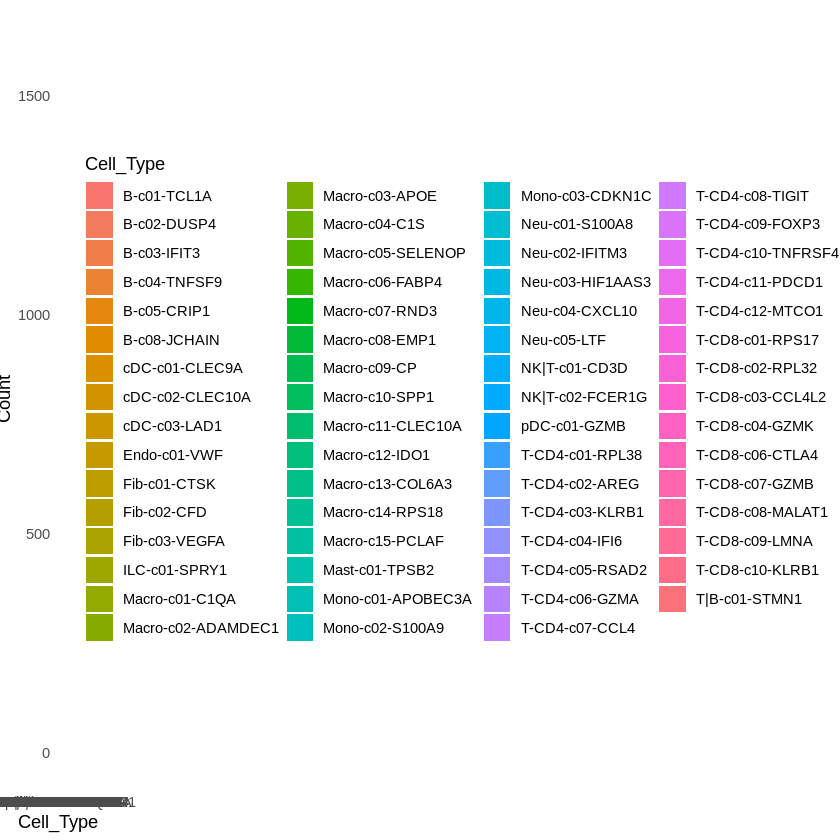

In [84]:
#这里将结果提取出来，然后进行展示，这里结果主要有三种
results <- myRCTD@results
# normalize the cell type proportions to sum to 1. 标准化后的数据为细胞类型比例
norm_weights = normalize_weights(results$weights)
cell_type_names <- myRCTD@cell_type_info$info[[2]] #list of cell type names
spatialRNA <- myRCTD@spatialRNA
resultsdir <- 'RCTD_Plots' ## you may change this to a more accessible directory on your computer.
dir.create(resultsdir)
plot_weights(cell_type_names, spatialRNA, resultsdir, norm_weights)
plot_weights_unthreshold(cell_type_names, spatialRNA, resultsdir, norm_weights)
library(ggplot2)
plot_cond_occur(cell_type_names, resultsdir, norm_weights, spatialRNA)
# RCTD文件结果是一个矩阵，矩阵包含了每个spot属于所有细胞类型的一个概率值，其和加起来为1
#norm_weights 
deconProp = as.data.frame(norm_weights)
write.table(deconProp,"8-RCTD_cell_norm_weight.csv",sep=",")

In [363]:
## 细胞组成图谱
#BiocManager::install("STdeconvolve")
library(STdeconvolve)
library(ggplot2)
library(patchwork)
library(dplyr)
library(cowplot)
library(RColorBrewer)
### visualize deconvolved cell-type proportions 显示整张片子上的63细胞比例
setwd("/workdir/user/T166457-Bone")
## 细胞细分类
deconProp<-read.csv("8-RCTD_cell_norm_weight.csv",check.names=F)
Bone_166457_sc_celltype<-Bone_166457_sc@meta.data[,c('celltype.low2','celltype')] #单细胞结果
## 细胞粗分类 14个class new_deconProp
new_deconProp = data.frame(matrix(NA, nrow(deconProp),0))
for (i in unique(Bone_166457_sc_celltype$celltype.low2)) { 
    subcelltype<-unique(Bone_166457_sc_celltype[Bone_166457_sc_celltype$celltype.low2==i,]$celltype)
    rep_columns = deconProp[,subcelltype] 
    if (length(subcelltype)==1){new_deconProp[,i]=rep_columns}
    else{new_deconProp[,i]= rowSums(rep_columns)}
}
rownames(new_deconProp) = rownames(deconProp)
write.csv(new_deconProp,"8-RCTD_cell_norm_weight_newClass.csv",row.names=T)
head(new_deconProp)
#rowSums(new_deconProp)

Monocytes    CD8+ T cells Fibroblasts Innate lymphoid cells
AAACAACGAATAGTTC-1 1.094898e-06 3.745763e-02 0.1735556   7.847926e-03         
AAACAAGTATCTCCCA-1 4.156034e-07 8.320689e-02 0.1039048   4.156034e-07         
AAACACCAATAACTGC-1 4.550818e-06 1.365245e-05 0.1038051   7.939530e-03         
AAACAGAGCGACTCCT-1 3.742353e-07 2.200459e-03 0.1286201   1.178497e-03         
AAACAGCTTTCAGAAG-1 1.232356e-09 5.372292e-02 0.1433491   2.845050e-02         
AAACAGGGTCTATATT-1 3.246087e-04 6.703067e-03 0.4325122   3.583596e-03         
                   CD4+ T cells Proliferating lymphoid cells Neutrophils 
AAACAACGAATAGTTC-1 0.11330431   0.012612193                  1.738818e-03
AAACAAGTATCTCCCA-1 0.13813660   0.096729063                  6.926727e-07
AAACACCAATAACTGC-1 0.19941813   0.006011901                  1.341044e-05
AAACAGAGCGACTCCT-1 0.15886755   0.013900422                  2.853424e-03
AAACAGCTTTCAGAAG-1 0.11291466   0.041916286                  1.514841e-03
AAACAGGGTCTATATT-1 0.03164102   0.008688084                  2.680039e-03
                   Plasmacytoid dendritic cells Macrophages
AAACAACGAATAGTTC-1 5.433287e-02                 0.5094092  
AAACAAGTATCTCCCA-1 6.096237e-02                 0.3151250  
AAACACCAATAACTGC-1 1.308411e-02                 0.5733118  
AAACAGAGCGACTCCT-1 1.247451e-07                 0.6105538  
AAACAGCTTTCAGAAG-1 7.411136e-03                 0.3865756  
AAACAGGGTCTATATT-1 7.834741e-03                 0.2848530  
                   Common dendritic cells B cells      Mast cells  
AAACAACGAATAGTTC-1 0.009738919            2.466594e-02 5.596978e-03
AAACAAGTATCTCCCA-1 0.022893045            1.191673e-01 2.193963e-03
AAACACCAATAACTGC-1 0.059786748            2.219525e-03 1.516939e-06
AAACAGAGCGACTCCT-1 0.065250788            6.237255e-07 1.257678e-03
AAACAGCTTTCAGAAG-1 0.016959940            5.635786e-02 6.178418e-03
AAACAGGGTCTATATT-1 0.013626467            1.822119e-02 3.151007e-02
                   Endothelial cells Plasma cells
AAACAACGAATAGTTC-1 0.02503839        0.024700188 
AAACAAGTATCTCCCA-1 0.02133535        0.036344020 
AAACACCAATAACTGC-1 0.01925468        0.015135407 
AAACAGAGCGACTCCT-1 0.01335440        0.001961741 
AAACAGCTTTCAGAAG-1 0.04713438        0.097514373 
AAACAGGGTCTATATT-1 0.03799994        0.119822031

In [355]:
## 细胞粗分类颜色设置
levels(Bone_166457_sc_celltype$celltype.low2)
cell_15_class_cols<-c("#9B3A4D","#E2AE79", "#D0DCAA","#F0EEBB","#8CBDA7","#566CA5","#70A0AC","#394A92","#68AC57",
                       "#497EB2","#8E549E","#D2352C","#F4C28F","#8AAFD1","#E0D755") 
names(cell_15_class_cols)<-levels(Bone_166457_sc_celltype$celltype.low2)
cell_15_class_cols_v2<-c("#80B1D3", "#FB9A99", "#FFF2AE", "#CAB2D6", "#F1E2CC","#6A3D9A", "#D9D9D9", "#666666", "#F2F2F2", "#66A61E", 
                       "#FF7F00", "#FDDAEC", "#BF5B17", "#E41A1C","#A6761D")
names(cell_15_class_cols_v2)<-levels(Bone_166457_sc_celltype$celltype.low2)
## 细胞细分类颜色设置
cell_71_class_cols<-c("#DBCD79", "#BE5B06", "#CB7B58", "#467273", "#DDB345","#A5907F", "#16402C", "#3B7346", "#593421", "#A86425",
                   "#D6B29C", "#564301", "#A86427", "#8B9165", "#8E0201","#D5B8B0", "#B95323", "#B97A33", "#3A4C4E", "#651F13",
                   "#EFAC29", "#261B23", "#784038", "#D97B0A", "#880C04","#8C9264", "#4A5916", "#A87645", "#712F3D", "#A56424",
                   "#7B809E", "#B7CBD6", "#667386", "#D3B8CB", "#C4959F","#F2C341", "#6290C2", "#C3E7DB", "#191B41", "#644F6E",
                   "#665156", "#C0A0A0", "#DDCBB7", "#548687", "#01120A","#B4C6C6", "#8C8D91", "#BE9AA8", "#EEB28E", "#F0CFBE",
                   "#D4B297", "#034B57", "#C05A05", "#A56248", "#d9b346","#F0DDBC", "#C89627", "#CC7C57", "#A68F7D", "#3c7445",
                   "#ABC385", "#C0D0E7", "#D3E1EE", "#EACBD1", "#97AF8F","#E4B5AD", "#9F324C", "#A2AAB0", "#4C586F", "#3E3E3B","#65BCB6")
names(cell_71_class_cols)<-levels(Bone_166457_sc_celltype$celltype)

[1] "Macrophages"                  "Monocytes"                   
 [3] "Common dendritic cells"       "Plasmacytoid dendritic cells"
 [5] "Neutrophils"                  "Mast cells"                  
 [7] "CD4+ T cells"                 "CD8+ T cells"                
 [9] "Innate lymphoid cells"        "B cells"                     
[11] "Plasma cells"                 "Proliferating lymphoid cells"
[13] "Fibroblasts"                  "Endothelial cells"           
[15] "Epithelial cells"

Macro-c01-C1QA Macro-c02-ADAMDEC1     Macro-c03-APOE      Macro-c04-C1S 
         "#DBCD79"          "#BE5B06"          "#CB7B58"          "#467273" 
 Macro-c05-SELENOP    Macro-c06-FABP4     Macro-c07-RND3     Macro-c08-EMP1 
         "#DDB345"          "#A5907F"          "#16402C"          "#3B7346" 
      Macro-c09-CP     Macro-c10-SPP1  Macro-c11-CLEC10A     Macro-c12-IDO1 
         "#593421"          "#A86425"          "#D6B29C"          "#564301" 
  Macro-c13-COL6A3    Macro-c14-RPS18    Macro-c15-PCLAF  Mono-c01-APOBEC3A 
         "#A86427"          "#8B9165"          "#8E0201"          "#D5B8B0" 
   Mono-c02-S100A9    Mono-c03-CDKN1C     cDC-c01-CLEC9A    cDC-c02-CLEC10A 
         "#B95323"          "#B97A33"          "#3A4C4E"          "#651F13" 
      cDC-c03-LAD1       pDC-c01-GZMB     Neu-c01-S100A8     Neu-c02-IFITM3 
         "#EFAC29"          "#261B23"          "#784038"          "#D97B0A" 
  Neu-c03-HIF1AAS3     Neu-c04-CXCL10        Neu-c05-LTF     Mast-c01-TPSB2 
         "#880C04"          "#8C9264"          "#4A5916"          "#A87645" 
   T-CD4-c01-RPL38     T-CD4-c02-AREG    T-CD4-c03-KLRB1     T-CD4-c04-IFI6 
         "#712F3D"          "#A56424"          "#7B809E"          "#B7CBD6" 
   T-CD4-c05-RSAD2     T-CD4-c06-GZMA     T-CD4-c07-CCL4    T-CD4-c08-TIGIT 
         "#667386"          "#D3B8CB"          "#C4959F"          "#F2C341" 
   T-CD4-c09-FOXP3  T-CD4-c10-TNFRSF4    T-CD4-c11-PDCD1    T-CD4-c12-MTCO1 
         "#6290C2"          "#C3E7DB"          "#191B41"          "#644F6E" 
   T-CD8-c01-RPS17    T-CD8-c02-RPL32   T-CD8-c03-CCL4L2     T-CD8-c04-GZMK 
         "#665156"          "#C0A0A0"          "#DDCBB7"          "#548687" 
   T-CD8-c06-CTLA4     T-CD8-c07-GZMB   T-CD8-c08-MALAT1     T-CD8-c09-LMNA 
         "#01120A"          "#B4C6C6"          "#8C8D91"          "#BE9AA8" 
   T-CD8-c10-KLRB1      ILC-c01-SPRY1      NK|T-c01-CD3D    NK|T-c02-FCER1G 
         "#EEB28E"          "#F0CFBE"          "#D4B297"          "#034B57" 
       B-c01-TCL1A        B-c02-DUSP4        B-c03-IFIT3       B-c04-TNFSF9 
         "#C05A05"          "#A56248"          "#d9b346"          "#F0DDBC" 
       B-c05-CRIP1       B-c08-JCHAIN      T|B-c01-STMN1       Fib-c01-CTSK 
         "#C89627"          "#CC7C57"          "#A68F7D"          "#3c7445" 
       Fib-c02-CFD      Fib-c03-VEGFA       Endo-c01-VWF               <NA> 
         "#ABC385"          "#C0D0E7"          "#D3E1EE"          "#EACBD1" 
              <NA>               <NA>               <NA>               <NA> 
         "#97AF8F"          "#E4B5AD"          "#9F324C"          "#A2AAB0" 
              <NA>               <NA>               <NA> 
         "#4C586F"          "#3E3E3B"          "#65BCB6"

In [331]:
## 显示各个cluster的细胞堆积图 细胞粗分类 14 类
area<-as.data.frame(new_deconProp)
area$X<-rownames(new_deconProp)
Bone_166457_tissue_metadata<-read.csv("Bone_166457_tissue_metadata.csv",header=T)
#head(Bone_166457_tissue_metadata)
Bone_166457_tissue_metadata_celltype<-merge(area,Bone_166457_tissue_metadata[,c(1,7,9:23)],by='X')
#head(Bone_166457_tissue_metadata_celltype)
## 计算每个cluster中每一类细胞的得分
Bone_166457_tissue_cluster_celltype<-aggregate(Bone_166457_tissue_metadata_celltype[,2:15],list(Bone_166457_tissue_metadata_celltype[,16]),sum)
colnames(Bone_166457_tissue_cluster_celltype)[1] <- c("cluster")
Bone_166457_tissue_cluster_celltype$cluster<-paste('c',Bone_166457_tissue_cluster_celltype$cluster,sep="")
Bone_166457_tissue_cluster_celltype$cluster<-factor(Bone_166457_tissue_cluster_celltype$cluster,
                                                    levels=c('c2','c0','c1','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14'))
#head(Bone_166457_tissue_cluster_celltype)
## 计算每个cluster中每一类细胞的比例
Bone_166457_tissue_cluster_celltype_per<-Bone_166457_tissue_cluster_celltype
Bone_166457_tissue_cluster_celltype_per[,2:15]<-Bone_166457_tissue_cluster_celltype[,2:15]/rowSums(Bone_166457_tissue_cluster_celltype[,2:15])
head(Bone_166457_tissue_cluster_celltype_per)
library(reshape2)
Bone_166457_tissue_cluster_celltype_melt<-melt(Bone_166457_tissue_cluster_celltype_per,id.vars=c('cluster'))
colnames(Bone_166457_tissue_cluster_celltype_melt) <- c("cluster", "celltype","freq")
head(Bone_166457_tissue_cluster_celltype_melt)
##堆积图
library(ggalluvial)
library(ggplot2)
df.sub <- Bone_166457_tissue_cluster_celltype_melt[Bone_166457_tissue_cluster_celltype_melt$cluster == "c2",]
df.sub <- df.sub[order(df.sub$freq, decreasing = F),]
Bone_166457_tissue_cluster_celltype_melt$celltype <- factor(Bone_166457_tissue_cluster_celltype_melt$celltype, 
                                                            levels = df.sub$celltype[order(df.sub$freq, decreasing = F)])
pdf("11-Bone_166457-F1_RCTD_rough_15class_barplot.pdf")
ggplot(Bone_166457_tissue_cluster_celltype_melt, aes(x = cluster, y = freq, fill = celltype, stratum=celltype, alluvium=celltype)) +
  geom_col(width=0.5, color="black") +
  geom_flow(width=0.5, alpha=0.5, knot.pos=0)+
  scale_fill_manual(values = cell_15_class_cols)+
  theme_cowplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.title.x=element_text(size=18),
        axis.title.y=element_text(size=18),
        axis.text.y=element_text(size=10),
        legend.text = element_text(size=12),
        legend.title = element_text(size=15))+
  labs(y="Cell Ratio", x="Cluster", fill="Cell Type")
dev.off()

cluster Monocytes    CD8+ T cells Fibroblasts Innate lymphoid cells
1 c0      0.0020582228 0.034023909  0.1254951   0.009053322          
2 c1      0.0018879532 0.035116687  0.1966046   0.008621811          
3 c2      0.0008855763 0.007479494  0.1075013   0.002484843          
4 c3      0.0062348318 0.018338379  0.3658730   0.006110117          
5 c4      0.0019771406 0.063309261  0.1190341   0.012713790          
6 c5      0.0033306241 0.053062262  0.1231418   0.012391200          
  CD4+ T cells Proliferating lymphoid cells Neutrophils 
1 0.15060293   0.028450631                  0.0014363284
2 0.08873733   0.017892407                  0.0017036715
3 0.16196151   0.024840242                  0.0018121022
4 0.04889680   0.007727648                  0.0017644705
5 0.13540845   0.028524505                  0.0016725122
6 0.14337078   0.038699205                  0.0006780495
  Plasmacytoid dendritic cells Macrophages Common dendritic cells B cells   
1 0.015921682                  0.4602739   0.05946388             0.05360576
2 0.019713097                  0.3483966   0.01706668             0.06938392
3 0.004365642                  0.5621546   0.07960765             0.01394849
4 0.006447356                  0.2626369   0.01835364             0.01725390
5 0.027247061                  0.3513453   0.03969083             0.10520412
6 0.030476902                  0.4366815   0.04213776             0.05090401
  Mast cells  Endothelial cells Plasma cells
1 0.003667466 0.03566577        0.020281088 
2 0.009695823 0.07059841        0.114581032 
3 0.001614032 0.02397347        0.007371018 
4 0.020371154 0.12752706        0.092464739 
5 0.004483404 0.03999717        0.069392307 
6 0.005981951 0.03689585        0.022248111

cluster celltype  freq        
1 c0      Monocytes 0.0020582228
2 c1      Monocytes 0.0018879532
3 c2      Monocytes 0.0008855763
4 c3      Monocytes 0.0062348318
5 c4      Monocytes 0.0019771406
6 c5      Monocytes 0.0033306241

png 
  2

In [372]:
## 显示各个cluster的细胞堆积图  ## 细胞详细分类 63 类
area<-deconProp
area$X<-rownames(deconProp)
Bone_166457_tissue_metadata<-read.csv("Bone_166457_tissue_metadata.csv",header=T)
Bone_166457_tissue_metadata_celltype<-merge(area,Bone_166457_tissue_metadata[,c(1,7,9:23)],by='X')
## 计算每个cluster中每一类细胞的得分
Bone_166457_tissue_cluster_celltype<-aggregate(Bone_166457_tissue_metadata_celltype[,2:64],list(Bone_166457_tissue_metadata_celltype[,65]),sum)
colnames(Bone_166457_tissue_cluster_celltype)[1] <- c("cluster")
Bone_166457_tissue_cluster_celltype$cluster<-factor(paste('c',Bone_166457_tissue_cluster_celltype$cluster,sep=""))
#head(Bone_166457_tissue_cluster_celltype)
Bone_166457_tissue_cluster_celltype_per<-Bone_166457_tissue_cluster_celltype
Bone_166457_tissue_cluster_celltype_per[,2:64]<-Bone_166457_tissue_cluster_celltype[,2:64]/rowSums(Bone_166457_tissue_cluster_celltype[,2:64])
## 按肉芽肿排序,选top15
new_per<-Bone_166457_tissue_cluster_celltype_per
rownames(new_per)<-new_per[,1]
new_per_t<-as.data.frame(t(new_per[,-1]))
new_per_t<-new_per_t[order(new_per_t$c2,decreasing=T),]
new_per_top15<-new_per_t[1:14,]
new_per_top15['others',]<- 1-colSums(new_per_top15)
new_per_top15$celltype<-rownames(new_per_top15)
new_per_top15
library(reshape2)
Bone_166457_tissue_cluster_celltype_melt<-melt(new_per_top15,id.vars=c('celltype')) #id.vars=c('cluster')
colnames(Bone_166457_tissue_cluster_celltype_melt) <- c("celltype","cluster","freq")
Bone_166457_tissue_cluster_celltype_melt$celltype <- factor(Bone_166457_tissue_cluster_celltype_melt$celltype, 
                                                            levels = rev(rownames(new_per_top15)))
Bone_166457_tissue_cluster_celltype_melt$cluster<-factor(Bone_166457_tissue_cluster_celltype_melt$cluster,
                                                    levels=c('c2','c0','c1','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14'))
#head(Bone_166457_tissue_cluster_celltype)
cell_71_class_cols<-c(cell_71_class_cols,'others'="#A6761D")## 增加一个其他颜色
pdf("12-Bone_166457-F1_RCTD_63class_top15class_barplot.pdf")
ggplot(Bone_166457_tissue_cluster_celltype_melt, aes(x = cluster, y = freq, fill = celltype, stratum=celltype, alluvium=celltype)) +
  geom_col(width=0.5, color="black") +
  geom_flow(width=0.5, knot.pos=0)+
  scale_fill_manual(values = cell_71_class_cols)+
  theme_cowplot() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.title.x=element_text(size=18),
        axis.title.y=element_text(size=18),
        axis.text.y=element_text(size=10),
        legend.text = element_text(size=12),
        legend.title = element_text(size=15))+
  labs(y="Cell Ratio", x="Cluster", fill="Cell Type")
dev.off()


c0          c1           c2         c3          
Macro-c02-ADAMDEC1 0.276524197 6.958541e-03 0.36575964 8.031864e-05
T-CD4-c12-MTCO1    0.102024114 3.786611e-02 0.09547618 1.115112e-02
Fib-c01-CTSK       0.105676452 7.038507e-02 0.08931033 3.924000e-02
Macro-c04-C1S      0.013744898 6.288142e-05 0.05264408 2.494117e-06
Macro-c06-FABP4    0.012436848 1.528024e-04 0.05014317 2.509179e-06
T-CD4-c07-CCL4     0.009668538 2.052457e-03 0.04376385 2.980056e-03
Macro-c09-CP       0.003338591 7.886917e-08 0.03955020 2.494117e-06
cDC-c03-LAD1       0.028046785 2.308983e-03 0.03599462 5.442290e-04
cDC-c01-CLEC9A     0.028092471 1.447887e-02 0.03302569 1.471677e-02
T|B-c01-STMN1      0.028450631 1.789241e-02 0.02484024 7.727648e-03
Endo-c01-VWF       0.035665766 7.059841e-02 0.02397347 1.275271e-01
Fib-c03-VEGFA      0.007175398 1.771102e-03 0.01643220 1.068831e-02
T-CD4-c10-TNFRSF4  0.013103573 1.016390e-02 0.01470636 3.451838e-03
Macro-c07-RND3     0.013759839 7.886917e-08 0.01429805 2.496595e-06
others             0.322291899 7.653083e-01 0.10008190 7.818827e-01
                   c4           c5           c6           c7          
Macro-c02-ADAMDEC1 0.0784748065 1.035258e-01 3.110348e-02 2.060102e-01
T-CD4-c12-MTCO1    0.0746453230 9.104950e-02 2.679906e-02 8.806860e-02
Fib-c01-CTSK       0.0753598454 9.710563e-02 7.032883e-02 1.349285e-01
Macro-c04-C1S      0.0019876137 5.546050e-04 4.553486e-04 2.708322e-03
Macro-c06-FABP4    0.0012514283 3.415202e-06 6.849028e-04 3.919182e-07
T-CD4-c07-CCL4     0.0052771293 3.668981e-03 6.081677e-03 3.134512e-03
Macro-c09-CP       0.0001812612 1.265018e-04 8.490184e-05 1.406728e-04
cDC-c03-LAD1       0.0139506751 1.166216e-02 2.468295e-03 8.470652e-03
cDC-c01-CLEC9A     0.0227958162 2.845664e-02 1.410341e-02 2.851733e-02
T|B-c01-STMN1      0.0285245050 3.869921e-02 6.857048e-03 2.503594e-02
Endo-c01-VWF       0.0399971728 3.689585e-02 7.431942e-02 4.068868e-02
Fib-c03-VEGFA      0.0031672598 2.853095e-03 3.627738e-03 3.816191e-03
T-CD4-c10-TNFRSF4  0.0076738950 1.081127e-02 7.320173e-03 8.448662e-03
Macro-c07-RND3     0.0038034812 5.247671e-04 8.335761e-05 1.584234e-02
others             0.6429097875 5.740626e-01 7.556824e-01 4.341890e-01
                   c8           c9           c10          c11         
Macro-c02-ADAMDEC1 2.806488e-02 1.554253e-03 8.165065e-02 7.150880e-04
T-CD4-c12-MTCO1    6.595827e-02 1.240725e-02 7.382205e-02 2.174701e-02
Fib-c01-CTSK       9.633742e-02 8.633831e-02 1.002798e-01 6.920414e-02
Macro-c04-C1S      8.333000e-07 3.259711e-06 1.070660e-04 2.363306e-06
Macro-c06-FABP4    8.340801e-07 8.898105e-05 5.191087e-04 2.380383e-06
T-CD4-c07-CCL4     1.078642e-03 3.416944e-03 1.781059e-03 4.009612e-03
Macro-c09-CP       8.333000e-07 3.246879e-06 3.420403e-06 2.359049e-06
cDC-c03-LAD1       2.588671e-03 1.867296e-03 1.370161e-02 8.372376e-04
cDC-c01-CLEC9A     1.902450e-02 1.239739e-02 2.091279e-02 8.320200e-03
T|B-c01-STMN1      2.635568e-02 6.150655e-03 2.762583e-02 5.222093e-03
Endo-c01-VWF       5.938592e-02 6.722822e-02 4.517697e-02 1.053935e-01
Fib-c03-VEGFA      1.351893e-03 2.335478e-03 1.636845e-03 1.369066e-02
T-CD4-c10-TNFRSF4  8.725439e-03 4.278854e-03 7.467484e-03 5.190172e-03
Macro-c07-RND3     8.333000e-07 3.285301e-06 4.770645e-04 2.361356e-06
others             6.911254e-01 8.019266e-01 6.248382e-01 7.656608e-01
                   c12          c13          c14          celltype          
Macro-c02-ADAMDEC1 1.622404e-03 1.052421e-02 8.566468e-03 Macro-c02-ADAMDEC1
T-CD4-c12-MTCO1    1.702754e-02 2.056870e-02 2.164916e-02 T-CD4-c12-MTCO1   
Fib-c01-CTSK       6.059684e-02 1.584854e-01 9.362256e-02 Fib-c01-CTSK      
Macro-c04-C1S      2.218459e-06 1.296279e-07 3.414735e-06 Macro-c04-C1S     
Macro-c06-FABP4    2.218459e-06 8.188241e-07 3.414735e-06 Macro-c06-FABP4   
T-CD4-c07-CCL4     2.464374e-03 2.768737e-03 3.289209e-03 T-CD4-c07-CCL4    
Macro-c09-CP       2.218459e-06 1.296279e-07 3.414735e-06 Macro-c09-CP      
cDC-c03-LAD1       1.467620e-03 5.565442e-0

png 
  2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


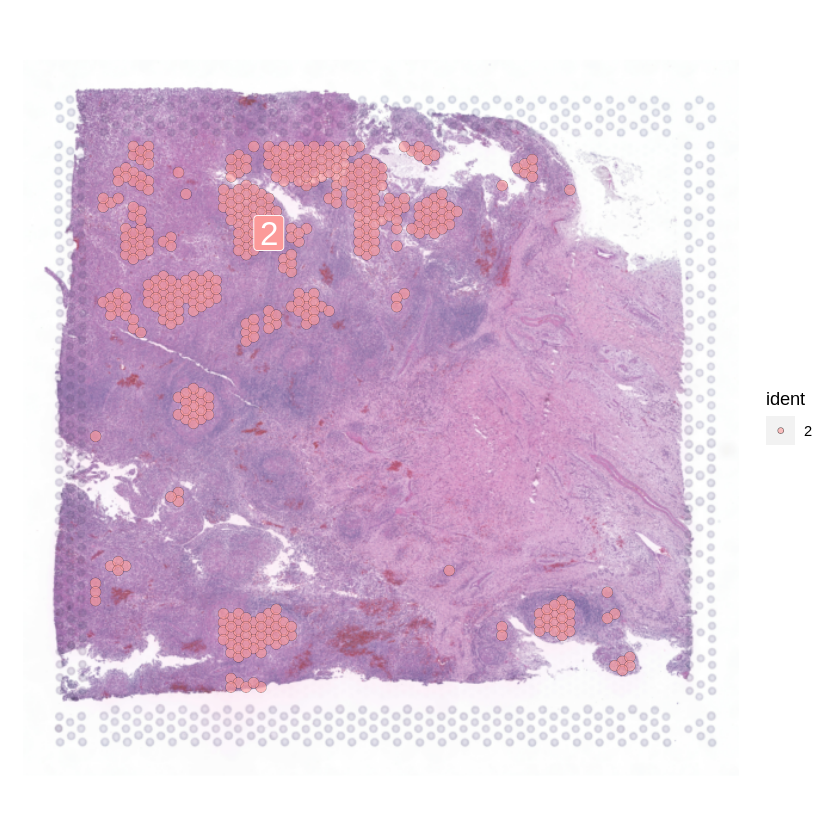

In [340]:
## 肉芽肿区域的精细细胞图谱
setwd("/workdir/user/T166457-Bone")
Bone_166457_tissue<-readRDS('/workdir/user/T166457-Bone/Bone_166457_tissue_UMAP.rds')
#这里二次聚类没有第一次好，所以按照第一次的结果来提取肉芽肿区域
Idents(Bone_166457_tissue)<-'SCT_snn_res.0.8'
Bone_166457_tissue_granuloma <- subset(Bone_166457_tissue, idents= c(2))
## 查看特定cluster的分布
SpatialDimPlot(Bone_166457_tissue_granuloma,crop = FALSE, label = TRUE,label.box = T,image.alpha = 0.7,alpha = 0.6,
                   cols=spatial_cluster_cols)
## 提取肉芽肿区域metadata
Bone_166457_tissue_granuloma_c2<-subset(Bone_166457_tissue_granuloma@meta.data,Bone_166457_tissue_granuloma@meta.data$SCT_snn_res.0.8 %in% c(2) )
head(Bone_166457_tissue_granuloma_c2)
write.csv(Bone_166457_tissue_granuloma_c2,"./Bone_166457_granuloma/3-Bone_166457_tissue_granuloma_metadatac_c2.csv")

In [1]:
## 肉芽肿 c2 结果
Bone_166457_tissue_granuloma_c2<-read.csv("./Bone_166457_granuloma/3-Bone_166457_tissue_granuloma_metadatac_c2.csv",header=T)
#head(Bone_166457_tissue_granuloma_c2)
## 15种细胞类型
f = intersect(Bone_166457_tissue_granuloma_c2$X,rownames(new_deconProp))
area = new_deconProp[f,names(cell_15_class_cols) %in% names(new_deconProp)] #names(cell_15_class_cols)[1:14] 主要是为了调整列的顺序从而对应单细胞和颜色
head(area)
pdf("./Bone_166457_granuloma/6-Bone_166457_tissue_RCTD_granuloma_15_cellClass_c2.pdf",width=10)
vizAllTopics(theta = area,pos = pos,
            topicCols = cell_15_class_cols,
            r = 0.008,lwd = 0,showLegend = TRUE, plotTitle = NA)
dev.off()
## ## 肉芽肿 c2 的细胞分类图 15 class 饼图
df1 <- data.frame(cell = colnames(area), number = colSums(area),mycols=cell_15_class_cols[names(cell_15_class_cols)%in%names(new_deconProp)])
head(df1)
df1 = df1[order(df1$number,decreasing = TRUE),]
df1$cell <- factor(df1$cell, levels = df1$cell[order(df1$number, decreasing = T)])
head(df1)
mylabel = as.vector(df1$cell)
mylabel = paste(mylabel," (",round(df1$number/sum(df1$number), 4)*100, "%", ")")
#mylabel
pdf("./Bone_166457_granuloma/6-Bone_166457_tissue_RCTD_granuloma_15_cellClass_c2_pie.pdf",width=15)
ggplot(df1, aes("", y = number, fill = cell))+
    geom_col(position = "fill")+
    scale_fill_manual(values = df1$mycols, labels = mylabel)+ 
    coord_polar(theta = "y", start = 0, direction = -1)+
    theme_minimal()+
    labs(y="", x="", fill="Cell Type (percentage)")+
    guides(fill=guide_legend(ncol = 3,#根据ncol或者nrow设置图例显示行数或列数（设置一个即可）
                            byrow = F))+#默认F，表示按照列填充)#默认F，表示升序填充，反之则降序
    theme(legend.text = element_text(size=15),
          legend.title = element_text(size=15),
          axis.text.x=element_blank(),
          panel.grid = element_blank(),
          legend.position="bottom")
dev.off()
## 70种细胞类型
names(deconProp)
f = intersect(Bone_166457_tissue_granuloma_c2$X,rownames(deconProp))
area =deconProp[f,names(cell_71_class_cols) %in% names(deconProp)]
head(area)
pdf("./Bone_166457_granuloma/6-Bone_166457_tissue_RCTD_granuloma_70_cellClass_c2.pdf",width=20,height=9)
vizAllTopics(theta = area,
                   pos = pos,
                   topicCols = cell_71_class_cols,
                   r = 0.0075,
                   lwd = 0,
                   showLegend = TRUE,
                   plotTitle = NA)
dev.off()
## 肉芽肿 c2 的细胞分类图 70 class 饼图 
df1 <- data.frame(cell = colnames(area), number = colSums(area),mycols=cell_71_class_cols[names(cell_71_class_cols)%in%names(deconProp)])
head(df1)
df1 = df1[order(df1$number,decreasing = TRUE),]
df1$cell <- factor(df1$cell, levels = df1$cell[order(df1$number, decreasing = T)])
#head(df)
mylabel = as.vector(df1$cell)
mylabel = paste(mylabel," (",round(df1$number/sum(df1$number), 4)*100, "%", ")")
#mylabel
pdf("./Bone_166457_granuloma/6-Bone_166457_tissue_RCTD_granuloma_70_cellClass_c2_pie.pdf",width=20,height=10)
ggplot(df1, aes("", y = number, fill = cell))+
    geom_col(position = "fill")+
    scale_fill_manual(values = df1$mycols, labels = mylabel)+ 
    coord_polar(theta = "y", start = 0, direction = -1)+
    theme_minimal()+
    labs(y="", x="", fill="Cell Type (percentage)")+
    guides(fill=guide_legend(ncol = 5,#根据ncol或者nrow设置图例显示行数或列数（设置一个即可）
                            byrow = F))+
    theme(legend.text = element_text(size=15),
          legend.title = element_text(size=15),
          axis.text.x=element_blank(),
          panel.grid = element_blank(),legend.position="bottom")
dev.off()
library(Hmisc) 
library(corrplot)
## 肉芽肿 c2 细胞共定位
f = intersect(Bone_166457_tissue_granuloma_c2$X,rownames(deconProp))
area =deconProp[f,]
#注意要将数据框转换为矩阵
cor <- rcorr(as.matrix(area), type = "pearson")
P = cor$P
## 低含量细胞过滤后共定位
select_cell_class<-c()
for (j in 1:ncol(area)){if (sum(area[j])/sum(area)>0.01){select_cell_class<-c(select_cell_class,colnames(area)[j])}}
area_filterd<-area[,select_cell_class]
head(area_filterd)
#注意要将数据框转换为矩阵
cor_filterd <- rcorr(as.matrix(area_filterd), type = "pearson")
#head(cor)
P = cor_filterd$P
pdf("./Bone_166457_granuloma/6-Bone_166457_tissue_RCTD_granuloma_70_cellClass_c2_filtered_cor.pdf",width=9)
corrplot(cor_filterd$r,method = "color",col = rev(COL2('RdBu', 200)),
        order = "hclust",tl.cex = 0.9,tl.col = "black",
) 
dev.off()

ERROR: Error in rownames(new_deconProp): object 'new_deconProp' not found


In [ ]:
## 细胞通讯分析 
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
## 整个样本的细胞通讯
## Create a CellChat object
data.input = Bone_166457_tissue@assays$SCT@data # normalized data matrix
meta = Bone_166457_tissue@meta.data # a dataframe with rownames containing cell mata data
meta$cell_cluster<-paste("c",meta$SCT_snn_res.0.8,sep="")
#cell.use = rownames(meta)[meta$condition == "LS"] # extract the cell names from disease data
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "cell_cluster")
## Set the ligand-receptor interaction database
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
# Show the structure of the database
#dplyr::glimpse(CellChatDB$interaction)
CellChatDB.use<-subsetDB(CellChatDB, search = "Secreted Signaling")
cellchat@DB <- CellChatDB.use
# Preprocessing the expression data for cell-cell communication analysis
# subset the expression data of signaling genes for saving computation cost
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
future::plan("multicore", workers = 4) # do parallel
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
# project gene expression data onto PPI (Optional: when running it, USER should set `raw.use = FALSE` in the function `computeCommunProb()` in order to use the projected data)
cellchat <- projectData(cellchat, PPI.human)
#Compute the communication probability and infer cellular communication network
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat) #计算信号通路水平上的细胞间通讯
cellchat <- aggregateNet(cellchat)
#Calculate the aggregated cell-cell communication network
## 计算聚合的细胞间通讯网络 可视化
groupSize <- as.numeric(table(cellchat@idents))
#pdf("15-Lung_167151_tissue_cellChat.pdf",width=15,height=7)
par(mfrow = c(1,2), xpd=TRUE) #
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#dev.off()
#ggsave(filename="15-Lung_167151_tissue_cellChat_count.pdf", plot=p1, width = 3, height = 2, units = 'in', dpi = 300)

In [59]:
# Identify signaling roles (e.g., dominant senders, receivers) of cell groups as well as the major contributing signaling
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
saveRDS(cellchat,"5-Bone_166457_tissue_cellChat.rds" )

In [385]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
cellchat<-readRDS("5-Bone_166457_tissue_cellChat.rds" )
#该热图可用于显示细胞-细胞通信网络中相互作用的不同数量或相互作用强度;
gg1 <- netVisual_heatmap(cellchat)
#> Do heatmap based on a merged object
gg2 <- netVisual_heatmap(cellchat, measure = "weight",color.heatmap = "Reds",color.use=spatial_cluster_cols[c(1,2,11:15,3:10)],
                         font.size = 20,font.size.title = 20)
gg2
pdf("4-Bone_166457_tissue_cellChat_heatmap.pdf",width=7,height=7) #
gg2
dev.off()

Do heatmap based on a single object 


Do heatmap based on a single object 


Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”


png 
  2

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



png 
  2

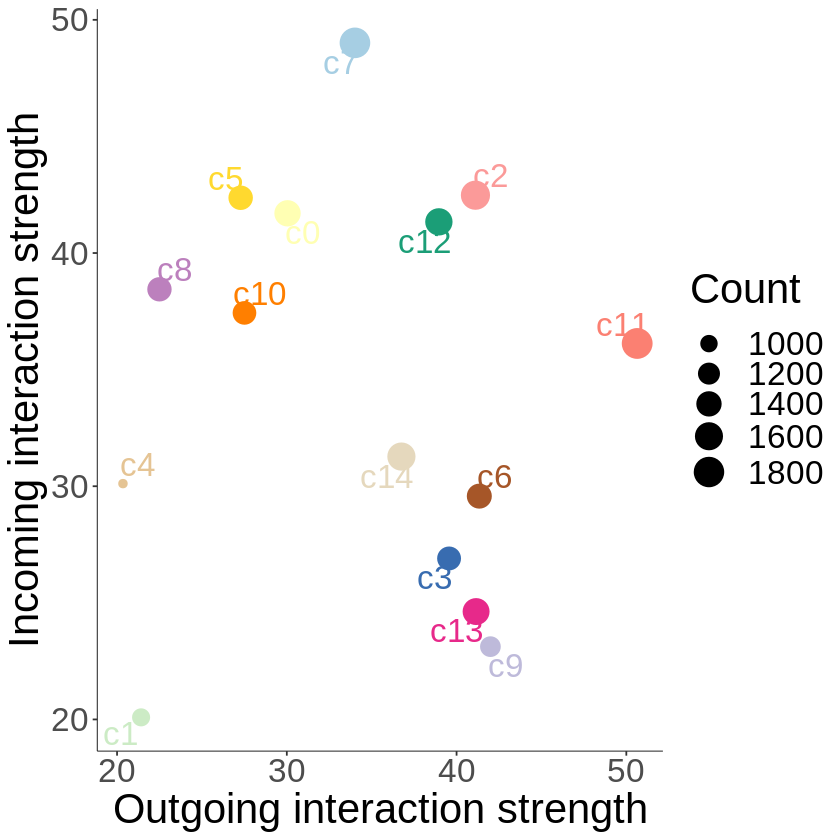

In [391]:
#Visualize the dominant senders (sources) and receivers (targets) in a 2D space
names(spatial_cluster_cols)<-paste('c',names(spatial_cluster_cols),sep="")
gg1 <- netAnalysis_signalingRole_scatter(cellchat,dot.size = c(2, 8),label.size =7,font.size = 25,dot.alpha=1,
                                        color.use=spatial_cluster_cols[c(1,2,11:15,3:10)])
gg1
#>ignaling role analysis on the aggregated cell-cell communication network from all signaling pathways
# Signaling role analysis on the cell-cell communication networks of interest
#gg2 <- netAnalysis_signalingRole_scatter(cellchat, signaling = c("CXCL", "CCL"))
#> Signaling role analysis on the cell-cell communication network from user's input
pdf("6-Bone_166457_tissue_cellChat_Role_scatter.pdf",width=7,height=7)
gg1
dev.off()

In [392]:
# Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
ht1<-netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing",font.size = 15,font.size.title = 18,height = 32)
ht2<-netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming",font.size = 15,font.size.title = 18,height = 32)
ht1
ht2
pdf("7-Bone_166457_tissue_cellChat_Role_heatmap_outgoing.pdf",width=14,height=20)
ht1
dev.off()
pdf("7-Bone_166457_tissue_cellChat_Role_heatmap_incoming.pdf",width=14,height=20)
ht2
dev.off()

png 
  2

png 
  2

In [374]:
## 显示特定基因的表达
pdf("13-Bone_166457-F1_geneFeature.pdf",width=15,height=20)
SpatialFeaturePlot(Bone_166457_tissue, features = c("IFNG","IL10","TNF","CXCL10","OSM",
                                                    "GRN","IL16","MIF","CCL4","CCL2","IL6",
                                                    "IL2","SPP1"),ncol=4)
dev.off()

png 
  2

In [382]:
## 找肉芽肿相较于其他区域的高变基因
Idents(Bone_166457_tissue)<-'SCT_snn_res.0.8'
#Bone_166457_tissue.markers <- FindAllMarkers(object = Bone_166457_tissue, only.pos = FALSE, min.pct = 0.20, logfc.threshold = 0.25)
cluster0.markers <- FindMarkers(Bone_166457_tissue, ident.1 = 0, min.pct = 0.25) 
cluster2.markers <- FindMarkers(Bone_166457_tissue, ident.1 = 2, min.pct = 0.25) 
cluster4.markers <- FindMarkers(Bone_166457_tissue, ident.1 = 4, min.pct = 0.25) 

In [386]:
write.csv(cluster0.markers,"14-Bone_166457_clusterMarkers_0.csv")
write.csv(cluster2.markers,"14-Bone_166457_clusterMarkers_2.csv")
write.csv(cluster4.markers,"14-Bone_166457_clusterMarkers_4.csv")

In [389]:
## 显示特定基因的表达
pdf("13-Bone_166457-F1_geneFeature_granuloma.pdf",width=15,height=20)
SpatialFeaturePlot(Bone_166457_tissue, features = c("FBP1","MT1G","MMP9","SPP1","C15orf48"),ncol=4)
dev.off()

png 
  2

In [394]:
?FindMarkers